In [21]:
import numpy as np
import pandas as pd

from PIL import Image
from scipy.ndimage import sobel
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import os

In [2]:
im = Image.open("nist_dataset/micrographs/micrograph20.tif")
#Image.open("nist_dataset/micrographs/micrographs/micrograph20.tif")

In [3]:
data = np.array(im)
print(data.shape)

(522, 645)


(array([[169.,  56.,  36., ...,  31.,  52.,  93.],
        [165.,  63.,  39., ...,  42.,  55.,  68.],
        [158.,  70.,  29., ...,  30.,  58.,  96.],
        ...,
        [ 95.,  47.,  33., ...,  41.,  54.,  47.],
        [ 88.,  35.,  43., ...,  43.,  43.,  62.],
        [ 82.,  38.,  43., ...,  37.,  46.,  49.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 645 BarContainer objects>)

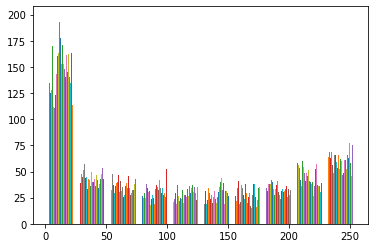

In [11]:
plt.hist(sobel(data[:-40,:]))

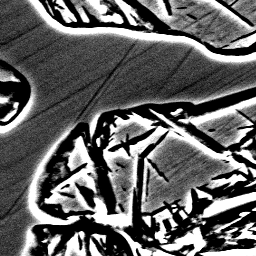

In [6]:
Image.fromarray(data[:256,:256])

In [6]:
np.savetxt("image_csv_files/image.csv",data[:256,:256], fmt="%d")

In [7]:
np.savetxt("image_csv_files/image1.csv",data[-256:,-256:], fmt="%d")


In [81]:
files = [file for file in os.listdir("nist_dataset/micrographs/")]
bottom_info = 38

In [83]:
files[:3]

['micrograph1.tif', 'micrograph10.png', 'micrograph1001.tif']

In [85]:
for file in files:
    im = Image.open("nist_dataset/micrographs/" + file)
    data = np.array(im)
    hstarts = np.array([0,190,385])
    hends = hstarts + 256
    np.savetxt(f"image_csv_files/{file[10:-4]:>05}_0.csv",data[:256, hstarts[0]:hends[0]], fmt="%d")
    np.savetxt(f"image_csv_files/{file[10:-4]:>05}_1.csv",data[:256, hstarts[1]:hends[1]], fmt="%d")
    np.savetxt(f"image_csv_files/{file[10:-4]:>05}_2.csv",data[:256, hstarts[2]:hends[2]], fmt="%d")
    np.savetxt(f"image_csv_files/{file[10:-4]:>05}_3.csv",data[-(256+bottom_info):-bottom_info,hstarts[0]:hends[0]], fmt="%d")
    np.savetxt(f"image_csv_files/{file[10:-4]:>05}_4.csv",data[-(256+bottom_info):-bottom_info,hstarts[1]:hends[1]], fmt="%d")
    np.savetxt(f"image_csv_files/{file[10:-4]:>05}_5.csv",data[-(256+bottom_info):-bottom_info,hstarts[2]:hends[2]], fmt="%d")

In [63]:
images=np.zeros((6,256,256))
for i in range(6):
    images[i] = np.loadtxt("image_csv_files/00001_" + str(i) + ".csv", dtype="uint8")

# sample output
raw = Image.fromarray(
    images[3]
)
raw.convert('L')

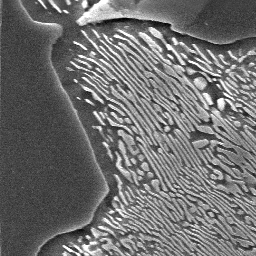

In [65]:
raw = Image.fromarray(
    images[0]
)
raw.convert('L')

In [76]:
print(f"Total csv size: {1.34*961}MB")

Total csv size: 1287.74MB


In [43]:
y = pd.read_csv("nist_dataset/class_labels.csv")
labels = list(y['primary_microconstituent'].unique())

In [57]:
def f(row):
    if row['primary_microconstituent'] == labels[0]: val = 0
    elif row['primary_microconstituent'] == labels[1]: val = 1
    elif row['primary_microconstituent'] == labels[2]: val = 2
    elif row['primary_microconstituent'] == labels[3]: val = 3
    elif row['primary_microconstituent'] == labels[4]: val = 4
    elif row['primary_microconstituent'] == labels[6]: val = 6
    else: val = 5
    return val

In [70]:
y['truth'] = y.apply(f,axis=1)
y

,micrograph_id,primary_microconstituent,truth
0,1,pearlite,0
1,2,spheroidite,1
2,4,pearlite+spheroidite,2
3,5,pearlite,0
4,6,spheroidite,1
...,...,...,...
956,1723,martensite,5
957,1726,spheroidite+widmanstatten,3
958,1730,spheroidite,1
959,1731,pearlite,0


In [56]:
labels

['pearlite',
 'spheroidite',
 'pearlite+spheroidite',
 'spheroidite+widmanstatten',
 'network',
 'martensite',
 'pearlite+widmanstatten']

In [68]:
y.drop(
    'primary_microconstituent',
    axis=1
).to_csv(
    "nist_dataset/final_class_labels.csv",
    index=False,
    header=None
)